Selecione uma opção:
        a) Cadastrar morador
        b) Cadastrar candidato
        c) Listar apartamentos
        d) Listar moradores
        e) Importar dados moradores e candidatos
        f) Realizar votação
        g) Realizar votação em lote
        h) Sair



Opção:  g



Eleição processada com sucesso

O condomínio esta realizando a apuração dos votos...


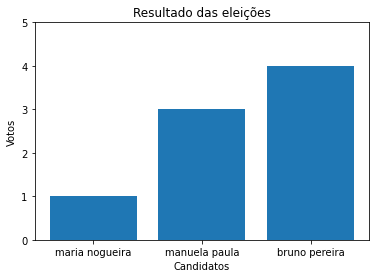

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

import random
import csv
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt


class Morador:
    def __init__(self, nome=None, apartamento=None, numero_apartamento=None):
        '''
        Representa um morador do prédio

        Parâmetros
        ----------
        nome : str (opcional)
            Nome do morador
        apartamento : Apartamento (opcional)
            Objeto da classe Apartamento
        '''
        self.nome = nome
        self.apartamento = apartamento

        if self.nome == None:
            self.nome = input("Qual o nome do morador? ")

        if self.apartamento == None:
            if numero_apartamento == None:
                numero_apartamento = input("Qual o número do apartamento? ")
                while not numero_apartamento.isnumeric():
                    numero_apartamento = input("Qual o número do apartamento? ")
            self.apartamento = Apartamento.criar_apartamento_morador(int(numero_apartamento), self)

    @staticmethod
    def importar_morador(nome, numero_apartamento):
        morador = Morador(nome, None, numero_apartamento)
        return True

    def __repr__(self):
        return self.morador_formatado()

    def morador_formatado(self):
        return f"* {self.nome.title()}"

    def votar(self, urna, numero_candidato=0):
        '''
        Acrescenta um voto na urna caso o apartamento não tenha votado ainda

        Parâmetros
        ----------
        urna : Urna
            Urna em que o voto será realizado
        numero_candidato : int (opcional)
            Número do candidato em que se deseja votar

        Retorno
        -------
        out : bool
          Retorna se o voto foi computado com sucesso.
            True -> voto computado
            False -> Voto já estava registrado
        '''
        while str(numero_candidato) not in urna.retornar_numero_candidatos_str():
            numero_candidato = input("Qual o número do candidato em quem deseja votar? ")
        return urna.votar(self.apartamento, int(numero_candidato))


class Candidato(Morador):

    def __init__(self, nome=None, apartamento=None, numero_apartamento=None):
        '''
        Representa um candidato como sendo um morador que poderá ser votado na eleição

        Parâmetros
        ----------
        nome : str (opcional)
          Nome do candidato
        apartamento : Apartamento (opcional)
           Objeto da classe apartamento onde o candidato mora
        '''
        self.numero_candidato = 0
        self.__votos = 0
        super().__init__(nome, apartamento, numero_apartamento)

    @staticmethod
    def importar_morador(nome, numero_apartamento):
        candidato = Candidato(nome, None, numero_apartamento)
        return candidato

    def __repr__(self):
        return self.morador_formatado()

    def morador_formatado(self):
        return f"* {self.nome.title()} : nº candidato {self.numero_candidato}"

    @property
    def votos(self):
        return self.__votos

    @votos.setter
    def contabiliza_votos(self, quantidade):
        self.__votos += quantidade


class Apartamento:
    lista_de_apartamentos = []

    def __init__(self, numero_apartamento):
        '''
        Representa um apartamento do prédio

        Parâmetros
        ----------
        numero_apartamento : int (obrigatório)
            Número do apartamento
        '''
        if (not isinstance(numero_apartamento, int)):
            raise ValueError('O número do apartamento precisar ser int.')
        if Apartamento.buscar_apartamento(numero_apartamento) != None:
            raise ValueError("O apartamento já existe!")

        self.lista_de_moradores = []
        self.__voto = False
        self.numero_apartamento = numero_apartamento
        Apartamento.lista_de_apartamentos.append(self)

    def __repr__(self):
        string_apartamento = f"Apartamento {self.numero_apartamento}:"

        for morador in self.lista_de_moradores:
            string_apartamento += "\n\t" + morador.morador_formatado()

        return string_apartamento + "\n"

    def adicionar_morador(self, morador):
        self.lista_de_moradores.append(morador)

    @property
    def voto(self):
        return self.__voto

    @voto.setter
    def atualiza_voto(self, valor):
        self.__voto = valor

    @staticmethod
    def criar_apartamento_morador(numero_apartamento, morador):
        '''
        Cadastra um novo apartamento

        Parâmetros
        ----------
        numero_apartamento : int (obrigatório)
          Número do apartamento a ser cadastrado
        morador : Morador (obrigatório)
          Objeto da classe Morador que habita o apartamento

        Retorno
        -------
        apartamento : Apartamento
          Objeto criado na classe Apartamento
        '''
        apartamento = Apartamento.buscar_apartamento(numero_apartamento)
        if apartamento == None:
            apartamento = Apartamento(numero_apartamento)
        apartamento.adicionar_morador(morador)
        return apartamento

    @staticmethod
    def buscar_apartamento(numero_apartamento):
        '''
        Verifica se o numero do apartamento já está na lista de apartamentos

        Parâmetros
        ----------
        numero_apartamento : int (obrigatório)
            Número do apartamento que deseja buscar

        Retorno:
        out : Apartamento
            Retorna o apartamento encontrado na lista ou vazio caso não esteja na lista
        '''
        apart = [apart for apart in Apartamento.lista_de_apartamentos if apart.numero_apartamento == numero_apartamento]
        if apart:
            return apart[0]
        else:
            return None


class Urna:
    def __init__(self):
        '''
        Representa uma urna para votação
        '''
        self.lista_de_apartamentos = []
        self.lista_de_candidatos = []

    def adiciona_apartamentos(self, apartamentos):
        '''
        Adiciona uma lista de apartamentos participantes na urna

        Parâmetros
        ----------
        apartamentos : list
            Adiciona os apartamentos fornecidos em uma lista de apartamentos relacionados àquela urna
        '''
        self.lista_de_apartamentos = apartamentos

    def adicionar_candidato(self, candidato):
        numeros = self.retornar_numero_candidatos()
        novo_numero = random.randint(1, 100)
        while novo_numero in numeros:
            novo_numero = random.randint(1, 100)
        candidato.numero_candidato = novo_numero
        self.lista_de_candidatos.append(candidato)

    def votar(self, apartamento, numero_candidato):
        if apartamento.voto == False:
            candidatos = [candidato for candidato in self.lista_de_candidatos if
                          candidato.numero_candidato == numero_candidato]

            if not candidatos:
                return False

            apartamento.atualiza_voto = True
            candidatos[0].contabiliza_votos = 1
            return True
        else:
            print("Seu apartamento já votou")
            return False

    def votacao_andamento(self):
        return any([True for apart in self.lista_de_apartamentos if apart.voto == False])

    def retornar_numero_candidatos(self):
        return [candidato.numero_candidato for candidato in self.lista_de_candidatos]

    def retornar_numero_candidatos_str(self):
        return [str(candidato.numero_candidato) for candidato in self.lista_de_candidatos]

    def retorna_apartamentos_pendentes_votacao(self):
        return [str(apart.numero_apartamento) for apart in self.lista_de_apartamentos if apart.voto == False]

    def imprime_apartamentos_pendente_votacao(self):
        '''
        Imprime os apartamentos que ainda não votaram
        '''
        for apartamento in [apart for apart in self.lista_de_apartamentos if apart.voto == False]:
            print(apartamento)


class Eleicao:

    def __init__(self, urna):
        if (len(urna.lista_de_candidatos) < 2):
            raise ValueError("É necessário ter no mínimo dois candidatos para realizar a eleição")
        self.urna = urna

    def realizar_eleicao_individual(self):
        while self.urna.votacao_andamento():
            clear_output(wait=True)
            print("Eleições do condomínio:")
            print("------------------------")
            print("Candidatos:\n")
            for candidato in self.urna.lista_de_candidatos:
                print(candidato)
            print("------------------------")
            print("Apartamentos que faltam votar:\n")
            self.urna.imprime_apartamentos_pendente_votacao()
            print("------------------------")
            numero_apartamento = input('Qual o número do seu apartamento: ')
            while str(numero_apartamento) not in self.urna.retorna_apartamentos_pendentes_votacao():
              numero_apartamento = input('Qual o número do seu apartamento: ')
            apartamento_morador = Apartamento.buscar_apartamento(int(numero_apartamento))
            print("------------------------")
            for index, morador in enumerate(apartamento_morador.lista_de_moradores):
                print(f"{index + 1}) {morador.nome}")

            print("------------------------")
            numero_morador = input("Digite o número correspondente ao seu nome: ")
            while not numero_morador in [str(i + 1) for i in range(len(apartamento_morador.lista_de_moradores))]:
                numero_morador = input("Digite o número correspondente ao seu nome: ")

            morador = apartamento_morador.lista_de_moradores[int(numero_morador) - 1]
            morador.votar(self.urna)

        print("\nEleição processada com sucesso")
        time.sleep(1)
        self.mostrar_resultados_votacao()
        return True


    def realizar_eleicao_lote(self):
        moradores = Sistema.retorna_dados_arquivo()

        for morador in moradores:
            apartamento = Apartamento.buscar_apartamento(int(morador["numero_apartamento"]))
            if apartamento != None:
                if apartamento.voto == False:
                    morador_votacao = [morador_aux for morador_aux in apartamento.lista_de_moradores if
                                       morador_aux.nome.lower() == morador["nome"].lower()]
                    candidato_votacao = [candidato_aux for candidato_aux in self.urna.lista_de_candidatos if
                                         candidato_aux.nome.lower() == morador["canditado_escolhido"].lower()]

                    if morador_votacao:
                        if candidato_votacao:
                            morador_votacao[0].votar(self.urna, candidato_votacao[0].numero_candidato)

        print("\nEleição processada com sucesso")
        time.sleep(1)
        self.mostrar_resultados_votacao()
        return True

    def mostrar_resultados_votacao(self):
        candidatos = [candidato.nome for candidato in self.urna.lista_de_candidatos]
        votos = [candidato.votos for candidato in self.urna.lista_de_candidatos]

        self.graficoVotos(candidatos, votos)
        print("\nO condomínio esta realizando a apuração dos votos...")
        time.sleep(1)

    def graficoVotos(self, candidatos, votos):
        # plt.grid(axis='y',linestyle='-', color='gray')
        plt.bar(candidatos, votos)
        plt.title('Resultado das eleições')
        plt.xlabel('Candidatos')
        plt.ylabel('Votos')
        votos = [candidato.votos for candidato in self.urna.lista_de_candidatos]
        plt.yticks([numero for numero in range(max(votos) + 2)])
        
        


class Sistema:
    def __init__(self):
        self.urna = Urna()
        self.opcao = None

    @staticmethod
    def retorna_dados_arquivo():
        moradores = []
        with open('moradores.csv', 'r', encoding="utf-8") as file:
            reader = csv.reader(file, delimiter=';')

            for linha in reader:
                moradores.append(
                    {
                        "nome": linha[0].lower(),
                        "numero_apartamento": linha[1],
                        "candidato": linha[2].lower() == 's',
                        "canditado_escolhido": linha[3]
                    }
                )
            return moradores

    def cadastrar_moradores(self):
        moradores = Sistema.retorna_dados_arquivo()

        for morador in moradores:
            if (morador["candidato"]):
                candidato = Candidato.importar_morador(morador["nome"], morador["numero_apartamento"])
                self.urna.adicionar_candidato(candidato)
            else:
                Morador.importar_morador(morador["nome"], morador["numero_apartamento"])

        print("Moradores importados com sucesso")

    def run(self):
        while self.opcao != "h":
            clear_output(wait=True)
            print('''Selecione uma opção:
        a) Cadastrar morador
        b) Cadastrar candidato
        c) Listar apartamentos
        d) Listar moradores
        e) Importar dados moradores e candidatos
        f) Realizar votação
        g) Realizar votação em lote
        h) Sair\n''')
            time.sleep(1)
            self.opcao = input('Opção: ').lower()

            if self.opcao == 'a':
                morador = Morador()
                print("Morador criado com sucesso")
                time.sleep(2)
            elif self.opcao == 'b':
                candidato = Candidato()
                self.urna.adicionar_candidato(candidato)
                print("Candidato criado com sucesso")
                time.sleep(2)
            elif self.opcao == 'c':
                if not Apartamento.lista_de_apartamentos:
                    print("Este prédio não possui apartamentos")

                for apartamento in Apartamento.lista_de_apartamentos:
                    print(apartamento)
                time.sleep(3)
            elif self.opcao == 'd':
                if not Apartamento.lista_de_apartamentos:
                    print("Este prédio não possui moradores")

                for apartamento in Apartamento.lista_de_apartamentos:
                    for morador in apartamento.lista_de_moradores:
                        print(morador)
                time.sleep(4)
            elif self.opcao == 'e':
                self.cadastrar_moradores()
                time.sleep(4)
            elif self.opcao == 'f':
                try:
                    self.urna.adiciona_apartamentos(Apartamento.lista_de_apartamentos)
                    eleicao = Eleicao(self.urna)
                    if eleicao.realizar_eleicao_individual():
                        break
                except Exception as erro:
                    print(erro)
                    time.sleep(4)
            elif self.opcao == 'g':
                try:
                    self.urna.adiciona_apartamentos(Apartamento.lista_de_apartamentos)
                    eleicao = Eleicao(self.urna)
                    if eleicao.realizar_eleicao_lote():
                        break
                except Exception as erro:
                    print(erro)
                    time.sleep(4)
            elif self.opcao == 'h':
                print('Sistema finalizado com sucesso')
            else:
                print("Opção inválida! Tente Novamente:")
                time.sleep(1)


if __name__ == "__main__":
    sistema = Sistema()
    sistema.run()